In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from skimage.filters import gaussian
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the directory containing your organized data
organized_data_dir = r'C:\Users\Administrator\OneDrive\Desktop\New folder'

# Iterate over each class directory in the organized data directory
total_images = 0
class_counts = {}

for class_name in os.listdir(organized_data_dir):
    class_dir = os.path.join(organized_data_dir, class_name)
    
    # Skip if not a directory
    if not os.path.isdir(class_dir):
        continue
    
    # Count the number of images in the class directory
    num_images = len(os.listdir(class_dir))
    
    # Update total count and class count dictionary
    total_images += num_images
    class_counts[class_name] = num_images

# Print the total number of images and counts for each class
print("Total number of images:", total_images)
print("Number of images in each class:")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count}")


Total number of images: 1209
Number of images in each class:
- Normal: 400
- PNEUMONIA: 400
- test: 3
- train: 3
- Tuberculosis: 400
- validation: 3


In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the directory containing your images
data_dir = "C:/physics99"

# Define the target directory for splitting
split_dir = "C:/physics99/split"

# Create destination directories for training, testing, and validation
train_dir = os.path.join(split_dir, "train")
test_dir = os.path.join(split_dir, "test")
validation_dir = os.path.join(split_dir, "validation")

for directory in [train_dir, test_dir, validation_dir]:
    os.makedirs(directory, exist_ok=True)

# Iterate over each class directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Get the list of image files for the current class
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]
    if not image_files:
        print(f"No image files found in {class_dir}. Skipping...")
        continue

    # Split the image files into training, testing, and validation sets
    train_files, test_val_files = train_test_split(image_files, test_size=0.2, random_state=42)
    test_files, validation_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    # Define destination directories for each set
    dest_dirs = {
        "train": train_dir,
        "test": test_dir,
        "validation": validation_dir
    }

    # Copy files to their respective destination directories
    for split, files in [("train", train_files), ("test", test_files), ("validation", validation_files)]:
        dest_dir = os.path.join(dest_dirs[split], class_name)
        os.makedirs(dest_dir, exist_ok=True)
        for file in files:
            src_path = os.path.join(class_dir, file)
            dest_path = os.path.join(dest_dir, file)
            shutil.copy(src_path, dest_path)

print("Dataset split and directories created successfully.")


No image files found in C:/physics99\split. Skipping...
Dataset split and directories created successfully.


Found 959 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.3468 - loss: 2.1627 - val_accuracy: 0.3333 - val_loss: 1.0361
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5225 - loss: 1.0233 - val_accuracy: 0.7417 - val_loss: 0.5521
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6165 - loss: 0.8230 - val_accuracy: 0.7583 - val_loss: 0.4749
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7257 - loss: 0.6683 - val_accuracy: 0.8583 - val_loss: 0.3526
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8128 - loss: 0.4839 - val_accuracy: 0.8833 - val_loss: 0.3088
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.7924 - loss: 0.5213 - val_accuracy: 0.8500 - val_loss: 0.3380
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7982 - loss: 0.5114 - val_accuracy: 0.8083 - val_loss: 0.3504
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8341 - loss: 0.4090 - val_accuracy: 0.8833 - val_loss: 0.2

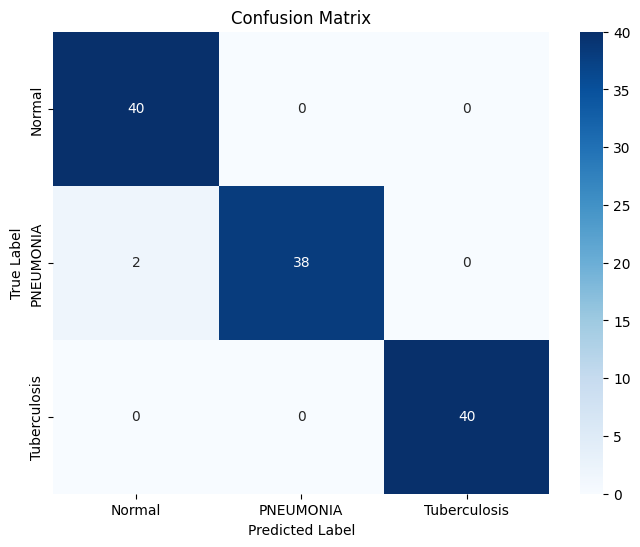

In [4]:
# Define data preprocessing parameters
batch_size = 64
image_size = (150, 150)
num_classes = 3
input_shape = (150, 150, 3)

# Define data directories
data_dir =r"C:\Users\Administrator\OneDrive\Desktop\New folder"
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
validation_dir = os.path.join(data_dir, 'validation')

# Data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Split the dataset into training, test, and validation sets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for confusion matrix
)

valid_data = test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=valid_data, epochs=100)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print('Test loss:', test_loss)
print(f'Test accuracy: {test_acc}')

# Generate predictions for the test data
test_data.reset()
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



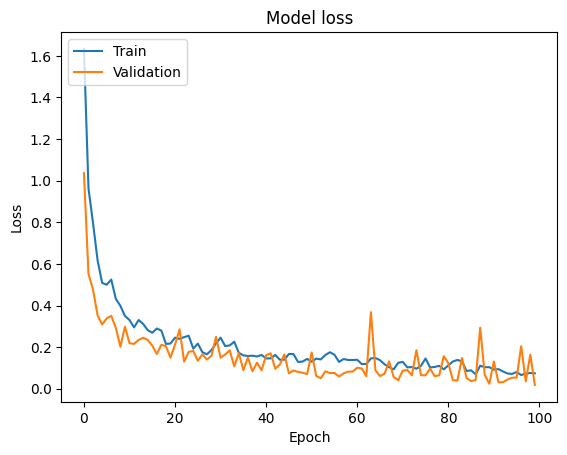

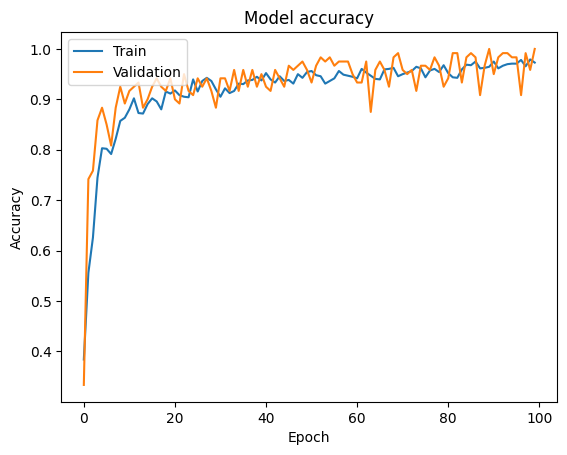

In [5]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot training history for loss
plot_loss(history)

# Plot training history for accuracy
plot_accuracy(history)


In [6]:
# Save the trained model
model.save('my_model.h5')
print("Model saved successfully as 'my_model.h5'.")


Model saved successfully as 'my_model.h5'.
